In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/Dataset.csv


In [27]:
import pandas as pd

df = pd.read_csv('/kaggle/input/dataset/Dataset.csv')

df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [28]:
df.columns 


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [31]:
all_cuisines = cuisine_series.str.split(',').explode().str.strip()
all_cuisines = all_cuisines[all_cuisines != '']
top_cuisines = all_cuisines.value_counts().head(3)
print(top_cuisines)

Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


In [38]:
total_restaurants = df['Cuisines'].shape[0]
percentages = (top_cuisines / total_restaurants * 100)
print("Percentage of restaurants that serve each of the top",percentages)

Percentage of restaurants that serve each of the top Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Name: count, dtype: float64


In [21]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Online_delivery_flag', 'Table_booking_flag'],
      dtype='object')


In [22]:
city_counts=df.City.value_counts()
print(city_counts)

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64


In [23]:
top_count=city_counts.max()
top_city=city_counts.idxmax()
print("city with maximum number of restaurants in ",top_city,"is",top_count)

city with maximum number of restaurants in  New Delhi is 5473


In [20]:
avg_rating=df.groupby("City")['Aggregate rating'].mean()
print(avg_rating)

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


In [21]:
max_rating=avg_rating.idxmax()
print("City with highest average rating is ",max_rating)

City with highest average rating is  Inner City


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

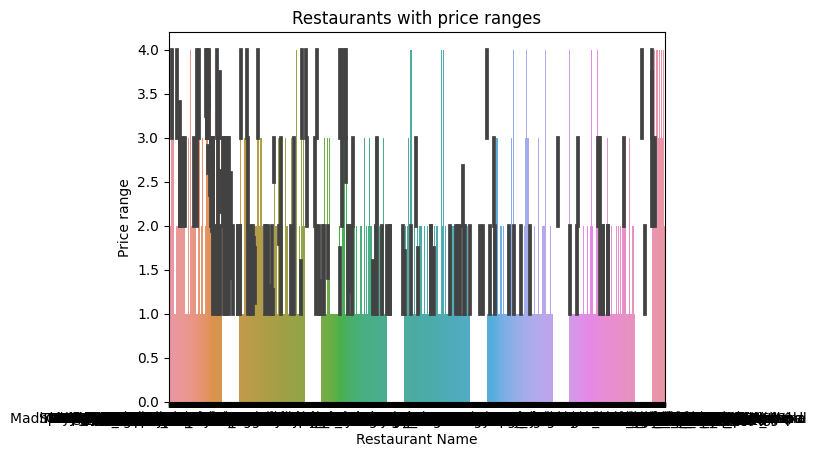

In [29]:
sns.barplot(x="Restaurant Name",y="Price range",data=df)
plt.title("Restaurants with price ranges")
plt.xlabel("Restaurant Name")
plt.show()

In [34]:
range=df.groupby("Price range").size()
percentage=(range/range.sum())*100
print("% of Restaurants in each price range are ",percentage)

% of Restaurants in each price range are  Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
dtype: float64


In [12]:
onlinein=df["Has Online delivery"].value_counts()
percent=(online.get("Yes")/onlinein.sum())*100
print("Number of restaurants which has online delivery =",percent)

Number of restaurants which has online delivery = 25.662234321013504


In [15]:
rate=df.groupby("Has Online delivery")["Aggregate rating"].mean()
on=rate.get("Yes")
off= rate.get("No")
if(on>off):
           print("Restaurants with Online delivery has better ratings with mean rating of ",on) 
else:
        print("Restaurants with Offline delivery has better ratings with mean rating of",off)

Restaurants with Online delivery has better ratings with mean rating of  3.2488372093023252


In [12]:
from collections import Counter 
def most(pos,neg,reviews):
    positive = ['good', 'very good', 'excellent', 'great']
    negative= ['bad', 'poor', 'average', 'worst']
    for review in reviews:
        for word in positive:
            if word in review:
                pos[word]=pos[word]+1
        for word in negative:
            if word in review:
                neg[word]=neg[word]+1             
pos=Counter()
neg=Counter()
reviews=df["Rating text"].str.lower()
most(pos,neg,reviews)
p=pd.Series(pos)
n=pd.Series(neg)
print("The most common positive keyword is ",p.idxmax(),"with",p.max(),"occurances")
print("The most common negative keyword is ",n.idxmax(),"with",n.max(),"occurances")

The most common positive keyword is  good with 3179 occurances
The most common negative keyword is  average with 3737 occurances


In [24]:
df['review_length'] = df['Rating text'].apply(len)
length= df.groupby('Aggregate rating')['review_length'].mean()
print(length)
correlation = df['Aggregate rating'].corr(df['review_length'])
print("Correlation between rating and review length:",correlation)
if correlation > 0:
    print("Longer reviews tend to have higher (better) ratings.")
elif correlation < 0:
    print("Longer reviews tend to have lower (worse) ratings.")
else:
    print("No clear relationship between review length and rating.")


Aggregate rating
0.0    9.0
1.8    4.0
1.9    4.0
2.0    4.0
2.1    4.0
2.2    4.0
2.3    4.0
2.4    4.0
2.5    7.0
2.6    7.0
2.7    7.0
2.8    7.0
2.9    7.0
3.0    7.0
3.1    7.0
3.2    7.0
3.3    7.0
3.4    7.0
3.5    4.0
3.6    4.0
3.7    4.0
3.8    4.0
3.9    4.0
4.0    9.0
4.1    9.0
4.2    9.0
4.3    9.0
4.4    9.0
4.5    9.0
4.6    9.0
4.7    9.0
4.8    9.0
4.9    9.0
Name: review_length, dtype: float64
Correlation between rating and review length: -0.4788848381349332
Longer reviews tend to have lower (worse) ratings.


In [22]:
vote_summary = df.groupby("Restaurant Name")["Votes"].sum()
high_restaurant = vote_summary.idxmax()
high_votes = vote_summary.max()
low_restaurant = vote_summary.idxmin()
low_votes = vote_summary.min()
print("Restaurant", high_restaurant, "has the highest votes with", high_votes, "votes")
print("Restaurant", low_restaurant, "has the lowest votes with", low_votes, "votes")

Restaurant Barbeque Nation has the highest votes with 28142 votes
Restaurant #hashtag has the lowest votes with 0 votes


In [25]:
correlation = df['Votes'].corr(df['Aggregate rating'])
print("Correlation between votes and rating:", correlation)
if correlation > 0:
    print("Restaurants with more votes tend to have higher ratings.")
elif correlation < 0:
    print("Restaurants with more votes tend to have lower ratings.")
else:
    print("No clear relationship between votes and ratings.")

Correlation between votes and rating: 0.3136905841954117
Restaurants with more votes tend to have higher ratings.


In [5]:
online_delivery_summary = df.groupby('Price range')['Has Online delivery'].value_counts()
print("Online Delivery availability by Price Range:")
print(online_delivery_summary)
table_booking_summary = df.groupby('Price range')['Has Table booking'].value_counts()
print("Table Booking availability by Price Range:")
print(table_booking_summary)
df['Online_delivery_flag'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Table_booking_flag'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
online_delivery_corr = df['Price range'].corr(df['Online_delivery_flag'])
table_booking_corr = df['Price range'].corr(df['Table_booking_flag'])
print("Correlation between Price Range and Online Delivery Availability: ",online_delivery_corr)
if online_delivery_corr > 0:
    print("Higher-priced restaurants are more likely to offer online delivery.")
elif online_delivery_corr < 0:
    print("Lower-priced restaurants are more likely to offer online delivery.")
else:
    print("No clear relationship between price and online delivery.")

print("Correlation between Price Range and Table Booking Availability",table_booking_corr)
if table_booking_corr > 0:
    print("Higher-priced restaurants are more likely to offer table booking.")
elif table_booking_corr < 0:
    print("Lower-priced restaurants are more likely to offer table booking.")
else:
    print("No clear relationship between price and table booking.")


Online Delivery availability by Price Range:
Price range  Has Online delivery
1            No                     3743
             Yes                     701
2            No                     1827
             Yes                    1286
3            No                      997
             Yes                     411
4            No                      533
             Yes                      53
Name: count, dtype: int64
Table Booking availability by Price Range:
Price range  Has Table booking
1            No                   4443
             Yes                     1
2            No                   2874
             Yes                   239
3            No                    764
             Yes                   644
4            No                    312
             Yes                   274
Name: count, dtype: int64
Correlation between Price Range and Online Delivery Availability:  0.07791776880448609
Higher-priced restaurants are more likely to offer online delivery.
C